## Generative Adversarial Networks Tuturial with MNIST

<a id = "1"></a>
### Introduction

<img src = "https://www.researchgate.net/publication/340458845/figure/fig1/AS:879437700669440@1586685695381/The-architecture-of-vanilla-GANs.ppm" width = "800" height = "500">

Generative Adversarial Networks, or GANs for short, are an approach to generative modeling using deep learning methods, such as convolutional neural networks.

Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset.

GANs are a clever way of training a generative model by framing the problem as a supervised learning problem with two sub-models: the generator model that we train to generate new examples, and the discriminator model that tries to classify examples as either real (from the domain) or fake (generated). The two models are trained together in a zero-sum game, adversarial, until the discriminator model is fooled about half the time, meaning the generator model is generating plausible examples.

<a id = "2"></a>
### Packages & Libraries

In [1]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

<a id = "3"></a>
### Data Import

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("X train shape: ", x_train.shape)
print("Y train shape: ", y_train.shape)
print("X test shape: ", x_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (60000, 28, 28)
Y train shape:  (60000,)
X test shape:  (10000, 28, 28)
Y test shape:  (10000,)


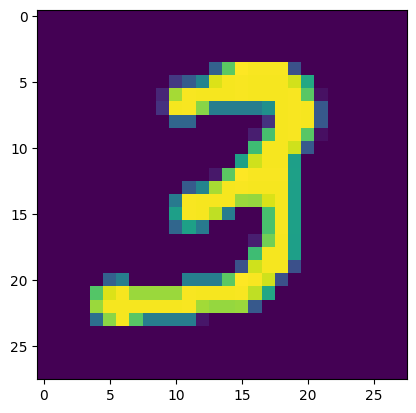

In [4]:
plt.imshow(x_train[107])

In [5]:
# x_train to (-1, 1)
x_train = (x_train.astype(np.float32)-127.5)/127.5

In [6]:
#reshape data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print("X train shape: ", x_train.shape)
print("X test shape: ", x_test.shape)

X train shape:  (60000, 784)
X test shape:  (10000, 784)


<a id = "4"></a>
### Create Model

**GAN Model Architecture**

It comprises of 2 sub-models

* Generator:-It is a model that is used to produce probable examples from the domain of the question provided earlier. The model uses a stable length vector as input and produces the sample in the domain. The vector which is used here is selected in a whimsical manner from the Gaussian Distribution. After the completion of training, the multidimensional vector formed will resemble points in the problem, forming a flattened view of the provided data distribution.
* Discriminator:- It is a model that is used to categorize examples as genuine or fake.

<a id = "5"></a>
#### Create Generator

In [7]:
# create generator
def create_generator():
    
    generator = Sequential()
    generator.add(Dense(units = 512, input_dim = 100))
    generator.add(ReLU())
    
    generator.add(Dense(units = 512))
    generator.add(ReLU())
    
    generator.add(Dense(units = 1024))
    generator.add(ReLU())
    
    generator.add(Dense(units = 784, activation = "tanh"))
    
    generator.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.0001, beta_1 = 0.5))
    
    return generator

In [8]:
g = create_generator()
g.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_1 (ReLU)              (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_2 (ReLU)              (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

/Users/lunde/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


<a id = "6"></a>
#### Create Discriminator

In [9]:
# create discriminator
def create_discriminator():
    
    discriminator = Sequential()
    discriminator.add(Dense(units = 1024, input_dim = 784))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units = 512))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units = 256))
    discriminator.add(ReLU())
    
    discriminator.add(Dense(units = 1, activation = "sigmoid"))
    
    discriminator.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.0001, beta_1 = 0.5))
    
    return discriminator

In [10]:
d = create_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 re_lu_3 (ReLU)              (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 re_lu_4 (ReLU)              (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

<a id = "7"></a>
#### Create GAN

In [11]:
# GANs
def create_gan(discriminator, generator):
    
    discriminator.trainable = False
    gan_input = Input(shape = (100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    
    gan = Model(inputs = gan_input, outputs = gan_output)
    
    gan.compile(loss = "binary_crossentropy", optimizer = "adam")
    
    return gan

In [12]:
gan = create_gan(d, g)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               1643280   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


<a id = "8"></a>
### Training

In [ ]:
epochs = 50
batch_size = 256

for e in range(epochs):
    for _ in range(batch_size):
        
        noise = np.random.normal(0, 1, [batch_size, 100])
        # generated image batch
        generated_images = g.predict(noise)
        # real image batch
        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = batch_size)]
        
        x = np.concatenate([image_batch, generated_images])
        # allocation discriminator predictions
        y_dis = np.zeros(batch_size * 2)
        y_dis[:batch_size] = 1
        
        d.trainable = True
        d.train_on_batch(x, y_dis)
        
        noise = np.random.normal(0, 1, [batch_size, 100])
        
        y_gen = np.ones(batch_size)
        
        d.trainable = False
        
        gan.train_on_batch(noise, y_gen)
    
    print("Epoch: ", e)

<a id = "9"></a>
### Result

In [25]:
g.save("g.hdf5")

4/4 [==============================] - 0s 3ms/step


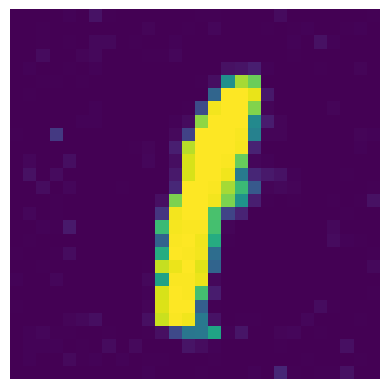

In [22]:
# a sample predicted image
noise = np.random.normal(loc = 0, scale = 1, size = [100, 100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100, 28, 28)
plt.imshow(generated_images[66], interpolation="nearest")
plt.axis("off")
plt.show()